In [2]:
#パッケージの読み込み
import matplotlib.pyplot as plt #図を描くライブラリ
import numpy as np #計算用ライブラリ
import pandas as pd #データフレームのライブラリ(表計算や描画)

import MeCab #形態素解析ライブラリ
import FunctionsMorphologicalAnalysis as fma #形態素解析するための自作関数

import statsmodels.formula.api as sm #回帰分析を行うためのライブラリ
import Matrix_HistogramScatterCorrelation as mhsc #ヒストグラム-散布図-相関係数マトリクスを描画するための自作関数

#Jupyter Notebook上で描画するためのコマンド
%matplotlib inline 

In [37]:
number_of_typhoon = pd.read_csv("generation.csv", encoding="shift-jis") #台風の発生数のデータを読み込む

number_of_typhoon.head(10) #データの最初の10行を表示


,年,1月,2月,3月,4月,5月,6月,7月,8月,9月,10月,11月,12月,年間
0,1951,NaN,1.0,1.0,2.0,1.0,1.0,3.0,3,2,4,1.0,2.0,21
1,1952,NaN,NaN,NaN,NaN,NaN,3.0,3.0,5,3,6,3.0,4.0,27
2,1953,NaN,1.0,NaN,NaN,1.0,2.0,1.0,6,3,5,3.0,1.0,23
3,1954,NaN,NaN,1.0,NaN,1.0,NaN,1.0,5,5,4,3.0,1.0,21
4,1955,1.0,1.0,1.0,1.0,NaN,2.0,7.0,6,4,3,1.0,1.0,28
5,1956,NaN,NaN,1.0,2.0,NaN,1.0,2.0,5,6,1,4.0,1.0,23
6,1957,2.0,NaN,NaN,1.0,1.0,1.0,1.0,4,5,4,3.0,NaN,22
7,1958,1.0,NaN,NaN,1.0,1.0,4.0,7.0,5,5,3,2.0,2.0,31
8,1959,NaN,1.0,1.0,1.0,NaN,NaN,2.0,5,5,4,2.0,2.0,23
9,1960,NaN,NaN,NaN,1.0,1.0,3.0,3.0,10,3,4,1.0,1.0,27


In [38]:
number_of_death = pd.read_csv("public_emdat_custom_request_2024-07-11_e5471c33-41a8-403d-bbf5-7429fdfa2888.csv", encoding="shift-jis") #死者数のデータを読み込む

number_of_death.head(10) #データの最初の10行を表示

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1951-0019-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ruth,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.531619,NaN,2003-07-01,2023-09-25
1,1953-0018-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.794130,NaN,2003-07-01,2023-09-25
2,1953-0043-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.794130,NaN,2003-07-01,2023-09-25
3,1954-0019-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.826944,NaN,2003-07-01,2023-09-25
4,1954-0051-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.826944,NaN,2003-07-01,2023-09-25
5,1954-0057-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.826944,NaN,2003-07-01,2023-09-25
6,1955-0047-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.787284,NaN,2003-07-01,2023-09-25
7,1956-0040-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.921295,NaN,2003-07-01,2023-09-25
8,1957-0039-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.219396,NaN,2003-07-01,2023-09-25
9,1958-0011-JPN,Yes,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,JPN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.471012,NaN,2003-07-01,2023-09-25


In [39]:
min_year = number_of_death['Start Year'].min()
max_year = number_of_death['Start Year'].max()
all_years = pd.DataFrame({'Start Year': range(min_year, max_year + 1)})

# 年ごとのTotal deathsを計算
yearly_deaths = number_of_death.groupby('Start Year')['Total Deaths'].sum().reset_index()

# すべての年を含むようにマージし、NaNを0に置き換え
yearly_deaths = pd.merge(all_years, yearly_deaths, on='Start Year', how='left').fillna(0)

yearly_deaths.tail(10) #データの最初の10行を表示

,Start Year,Total Deaths
63,2014,33.0
64,2015,11.0
65,2016,25.0
66,2017,12.0
67,2018,24.0
68,2019,102.0
69,2020,2.0
70,2021,0.0
71,2022,8.0
72,2023,8.0


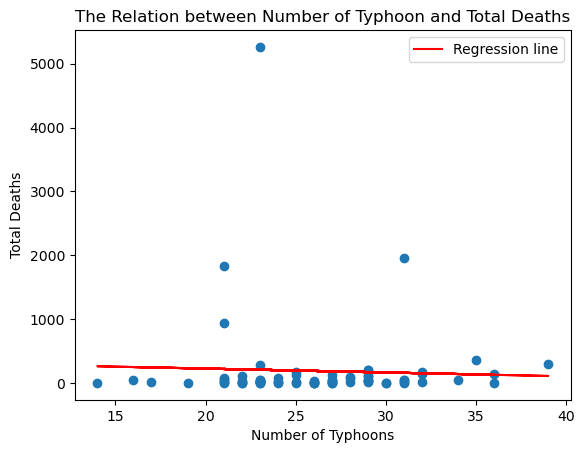

In [36]:
fig , ax = plt.subplots() #図を描くためのキャンバスを作成

X = number_of_typhoon["年間"] #x軸のデータ
Y = yearly_deaths["Total Deaths"] #y軸のデータ


ax.scatter(X,Y)

#回帰分析
result = sm.ols(formula = "Y ~ X", data = {"X":X, "Y":Y}).fit() #回帰分析を実行

X_plot = pd.DataFrame({"X": X})
Y_plot = result.predict(X_plot)
ax.plot(X, Y_plot, color='red', label='Regression line')

# ラベルとタイトル
ax.set_xlabel('Number of Typhoons')
ax.set_ylabel('Total Deaths')
ax.set_title('The Relation between Number of Typhoon and Total Deaths')
ax.legend()

# 図を表示
plt.show()